# Product Sales effectiveness

# FicZon Inc

### Project Summary

- Ficzon Inc is an IT solution provider with products ranging from on-premises products to SAAS based solution. Ficzon major leads generation channel is digital and through their website.

- FicZon business is majorly on the sales force effectiveness. As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales. Effectiveness sales in dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff. Though there is a quality process, which continuously updates the lead categorization, it's value is in for post analysis, rather than a conersation.

- Ficzon want to explore machine learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness.

#### PROJECT GOAL :

- 1. Data exploration insights - Sales effectiveness.
- 2. ML model to predict the Lead Category

### Analysis

- The data is supervised and categorical. The predictor variable are nominal. The target variable "Status" is nominal as well.
- Most of the Columns had a lot of different labels, so we compressed and merged the labels such that only the main ones were included and then used Label Encoding. The predictor variable was categorized into two types 'High Potential' and 'Low Potential'


### Summary

- The project is done with the purpose of finding out the Lead quality, whether the lead should be followed or not. The company motive is to invest in the right prospects, So therefore we divide the Lead as 'High Potential' or 'Low Potential'. This resulted in increase of accuracy drastically. The following steps were carried out:

-  Import the data, find out the predictor and target and drop columns which has no use in analysis.
-  Compress and merge the labels such that only the main ones are included and use Label Encoding.
-  Split it into test and train and use Smote.
-  Train the data using algorithms like Logistic Regression , Decision Tree Classifier, Random forest classifier and 
    Gradient Boosting Classifier and check the accuracy to find out which algorithm is the best.
-  Export the model with highest accuracy.

## Results
- Gradient boosting Classifier gave an accuracy of 73%

# Domain Analysis

Created
- This is unique feature in data tell about activity related to the selling and no of goods sold in certain date as well as time.

Product ID: unique
- Id of particular product

Source :
- The source is contain information about the customer systematic search like call, live chats, and campaign.

Mobile :
- This is unique feature contain a mobile number of customer.

Email :
- This is a unique feature contain a Mobile number of customer.

Sales Agent :
- Sales agent is a front line customer service, A person or a company that acts as a sales agent on behalf of the exporting company (principal),introducing it's product to potential buyers in the external market, in exchange for a commission based on the value of the business deals arranged and paid to the principAL.

Location :
- The location of sale field always has the main business address in it and has to be changed manually. This also means that the sales tax is computed based on the main business address and not the actual location of the sale.
- This feature contain lots of different location.

Delivery mode :
- Modes pf Delivery of goods may be made in any of the following three ways :


1. Actual Delivery : Also known as physical delivery, actual delivery takes place when the goods are physically handed over by seller or his/her authorized agent to the buyer or his/her agent authorized to take possession of the goods.

2. Symbolic Delivery : Where the goods are bulky and heavy and it is not possible to physically hand them over to the buyer, delivery thereof may be made by indicating or giving a symbol. Here the goods itself are not delivered, but the means of obtaining possession of goods is delivered.

3. Constructive Delivery: In this case neither physical nor symbolic delivery is made. In constructive delivery the individual possessing the products recognizes that he holds the merchandise for the benefit of, and at the disposal of the purchaser. Constructive delivery is also called attornment.

Status :
- This is a target variable tell about the lead category of customer.[high potential, low potential]

In [1]:
import os
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
## making connection to data base server

connection=mysql.connector.connect(host = '18.136.157.135',
                                   user = 'dm_team2',
                                   password = 'DM!$Team&27@9!20!')

In [3]:
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_sales',)


In [4]:
## connecting the database
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!',
                                  database='project_sales')

In [5]:
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_sales
0                    data


In [6]:
query = "select * from data" # SQL statement
output = pd.read_sql(query,connection)
print(output.shape)
output

(7422, 9)


,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [7]:
data = pd.read_sql(query, connection)

In [8]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [9]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [10]:
data.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


# Data Preprocessing

In [11]:
## Droping the columns which are of no use in analysis

data.drop(['Mobile'], axis=1, inplace=True)
data.drop(['EMAIL'], axis=1, inplace=True)
data.drop(['Created'], axis=1, inplace=True)

In [12]:
## Droping rows with a issing data beacuse they are few

data.replace('',np.nan, inplace=True)
data.dropna(inplace=True)
data.reset_index(inplace=True, drop=True)
data.shape

(7328, 6)

In [13]:
data.Source.unique()

array(['Live Chat-Google Organic', 'Call', 'Website', 'Live Chat-Direct',
       'By Recommendation', 'Customer Referral', 'Live Chat-Blog',
       'Live Chat -PPC', 'Live Chat-Google Ads',
       'Live Chat-Adwords Remarketing', 'E-Mail Message',
       'Existing Client', 'Live Chat-CPC', 'Existing Customer',
       'Live Chat-Quora', 'US Website', 'Just Dial', 'Campaign', 'Other',
       'E-mail Campaign', 'CRM form', 'SMS Campaign', 'Personal Contact',
       'Live Chat-Youtube', 'Live Chat-Justdial'], dtype=object)

In [14]:
## compressing and Merging the labels in column

data.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-Quora',
                    'Live Chat-CPC','Live Chat-Google Ads','Live Chat-Adwords Remarketing',
                    'Live Chat-Youtube','Live Chat-Justdial'],'Live Chat',inplace = True)
data.Source.replace(['Existing Client','CRM form','Personal Contact'],'Existing Customer',inplace=True)
data.Source.replace('By Recommendation','Customer Referral',inplace=True)
data.Source.replace(['US Website','Just Dial'],'Website',inplace=True)
data.Source.replace(['E-mail Campaign','SMS Campaign','E-Mail Message','Other'],'Campaign',inplace=True)

In [15]:
data.Location.unique()

array(['Bangalore', 'Other Locations', 'Trivandrum', 'Hyderabad',
       'Chennai', 'UK', 'USA', 'Delhi', 'UAE', 'Mumbai', 'Kolkata',
       'Singapore', 'Pune', 'AUSTRALIA', 'EUROPE', 'Malaysia', 'Howrah'],
      dtype=object)

In [16]:
data.Location.replace(['UAE','USA','UK','Singapore','AUSTRALIA', 'EUROPE', 'Malaysia',],'Foreign',inplace=True)
data.Location.replace(['Howrah','Trivandrum', 'Kolkata',],'Other Locations',inplace=True)

In [17]:
data.Product_ID.unique()

array(['9', '19', '18', '15', '27', '5', '2', '3', '25', '10', '20', '11',
       '21', '1', '12', '13', '24', '26', '16', '23', '22', '8', '14',
       '6', '17', '0', '28', '7', '4'], dtype=object)

In [18]:
data.Product_ID.replace(['8','6','3','17','22','11','7','28,','0','23','24','16','13',
                        '4','14','26','12','2','21','25'],'minimum_sold',inplace=True)

In [19]:
data.Status.unique()

array(['Potential', 'Not Responding', 'In Progress Positive',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'Open', 'LOST', 'Long Term', 'converted'], dtype=object)

In [20]:
## Defining 'Status' as 'Good' or 'Bad'

data.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'High Potential',inplace=True)
data.Status.replace(['LOST','Just Enquiry','Junk Lead','In Progress Negative','Not Responding'],'Low Potential', inplace=True)

In [21]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9,Live Chat,Sales-Agent-3,Bangalore,Mode-1,High Potential
1,19,Call,Sales-Agent-4,Other Locations,Mode-5,High Potential
2,18,Website,Sales-Agent-11,Other Locations,Mode-1,High Potential
3,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Low Potential
4,18,Call,Sales-Agent-7,Bangalore,Mode-1,High Potential


# Exploratory Data Analysis

In [141]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


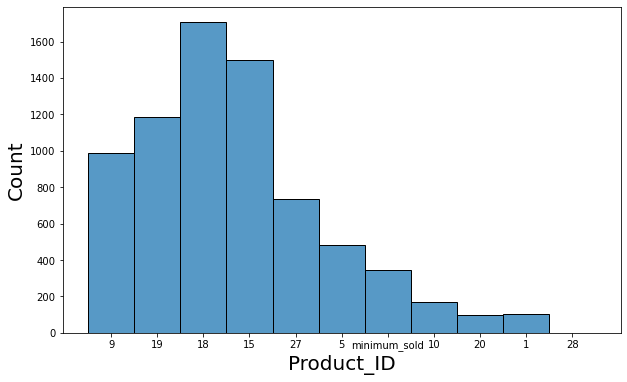

In [22]:
plt.figure(figsize=(10,6),facecolor='white')
sns.histplot(data['Product_ID'])
plt.xlabel('Product_ID',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

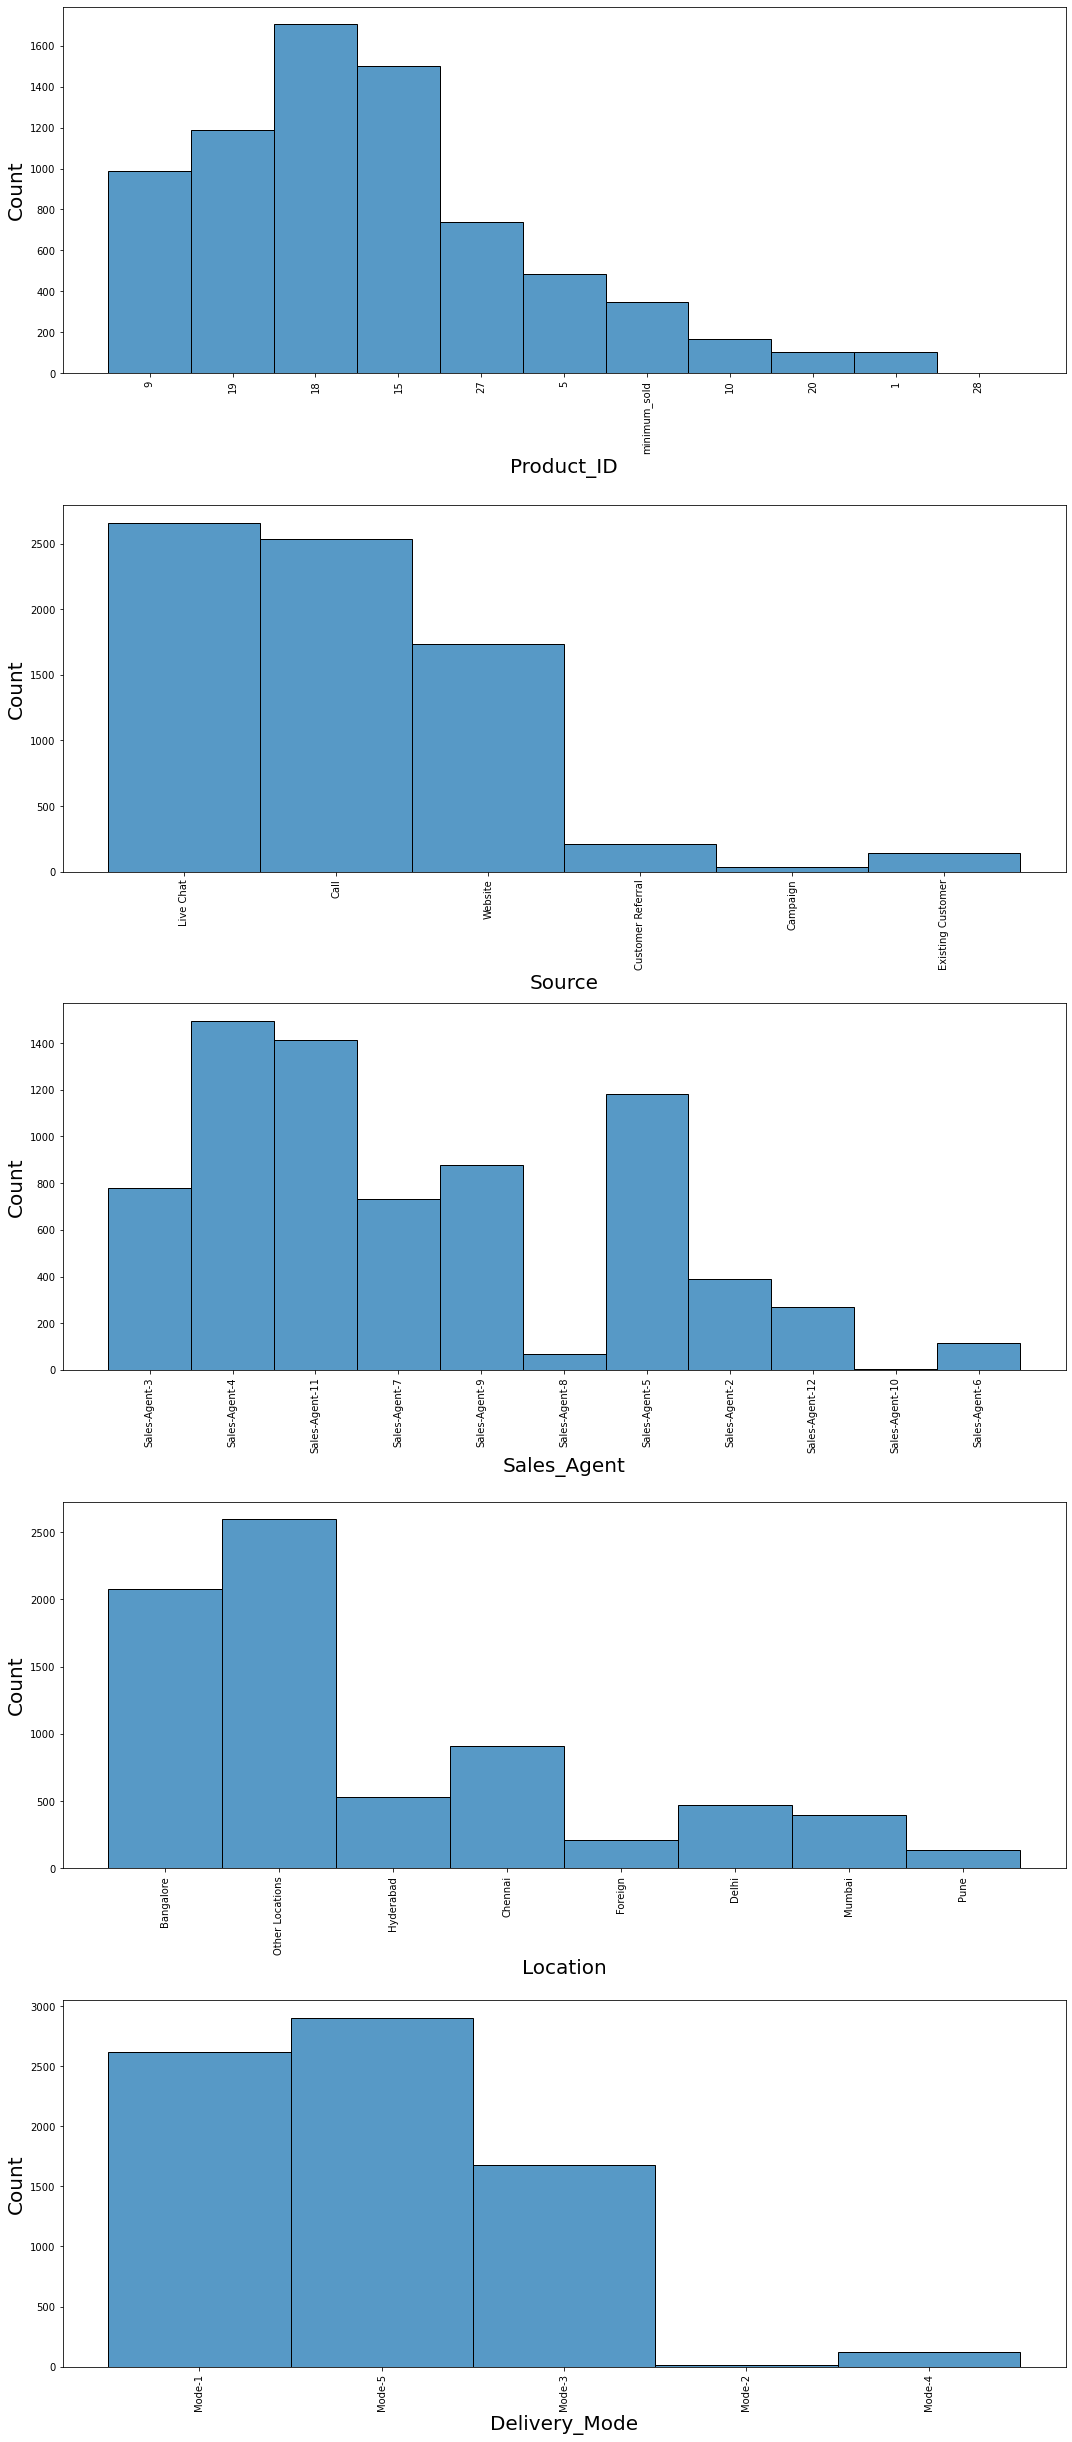

In [23]:
plt.figure(figsize=(15,40),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<6:
        ax=plt.subplot(6,1,plotnumber)
        sns.histplot(data[column],palette='data')
        plt.xticks(rotation=90)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Bivariate Analysis

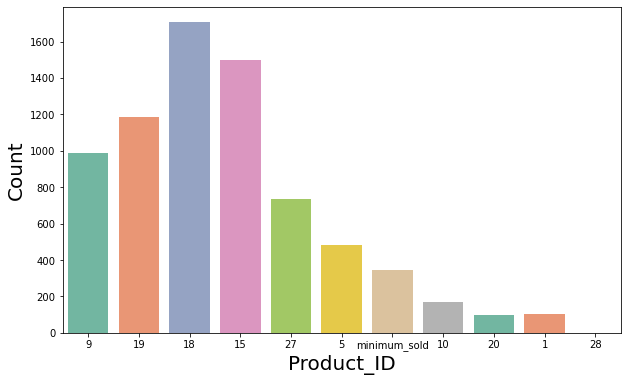

In [24]:
plt.figure(figsize=(10,6),facecolor='white')
sns.countplot(data['Product_ID'],palette='Set2')
plt.xlabel('Product_ID',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

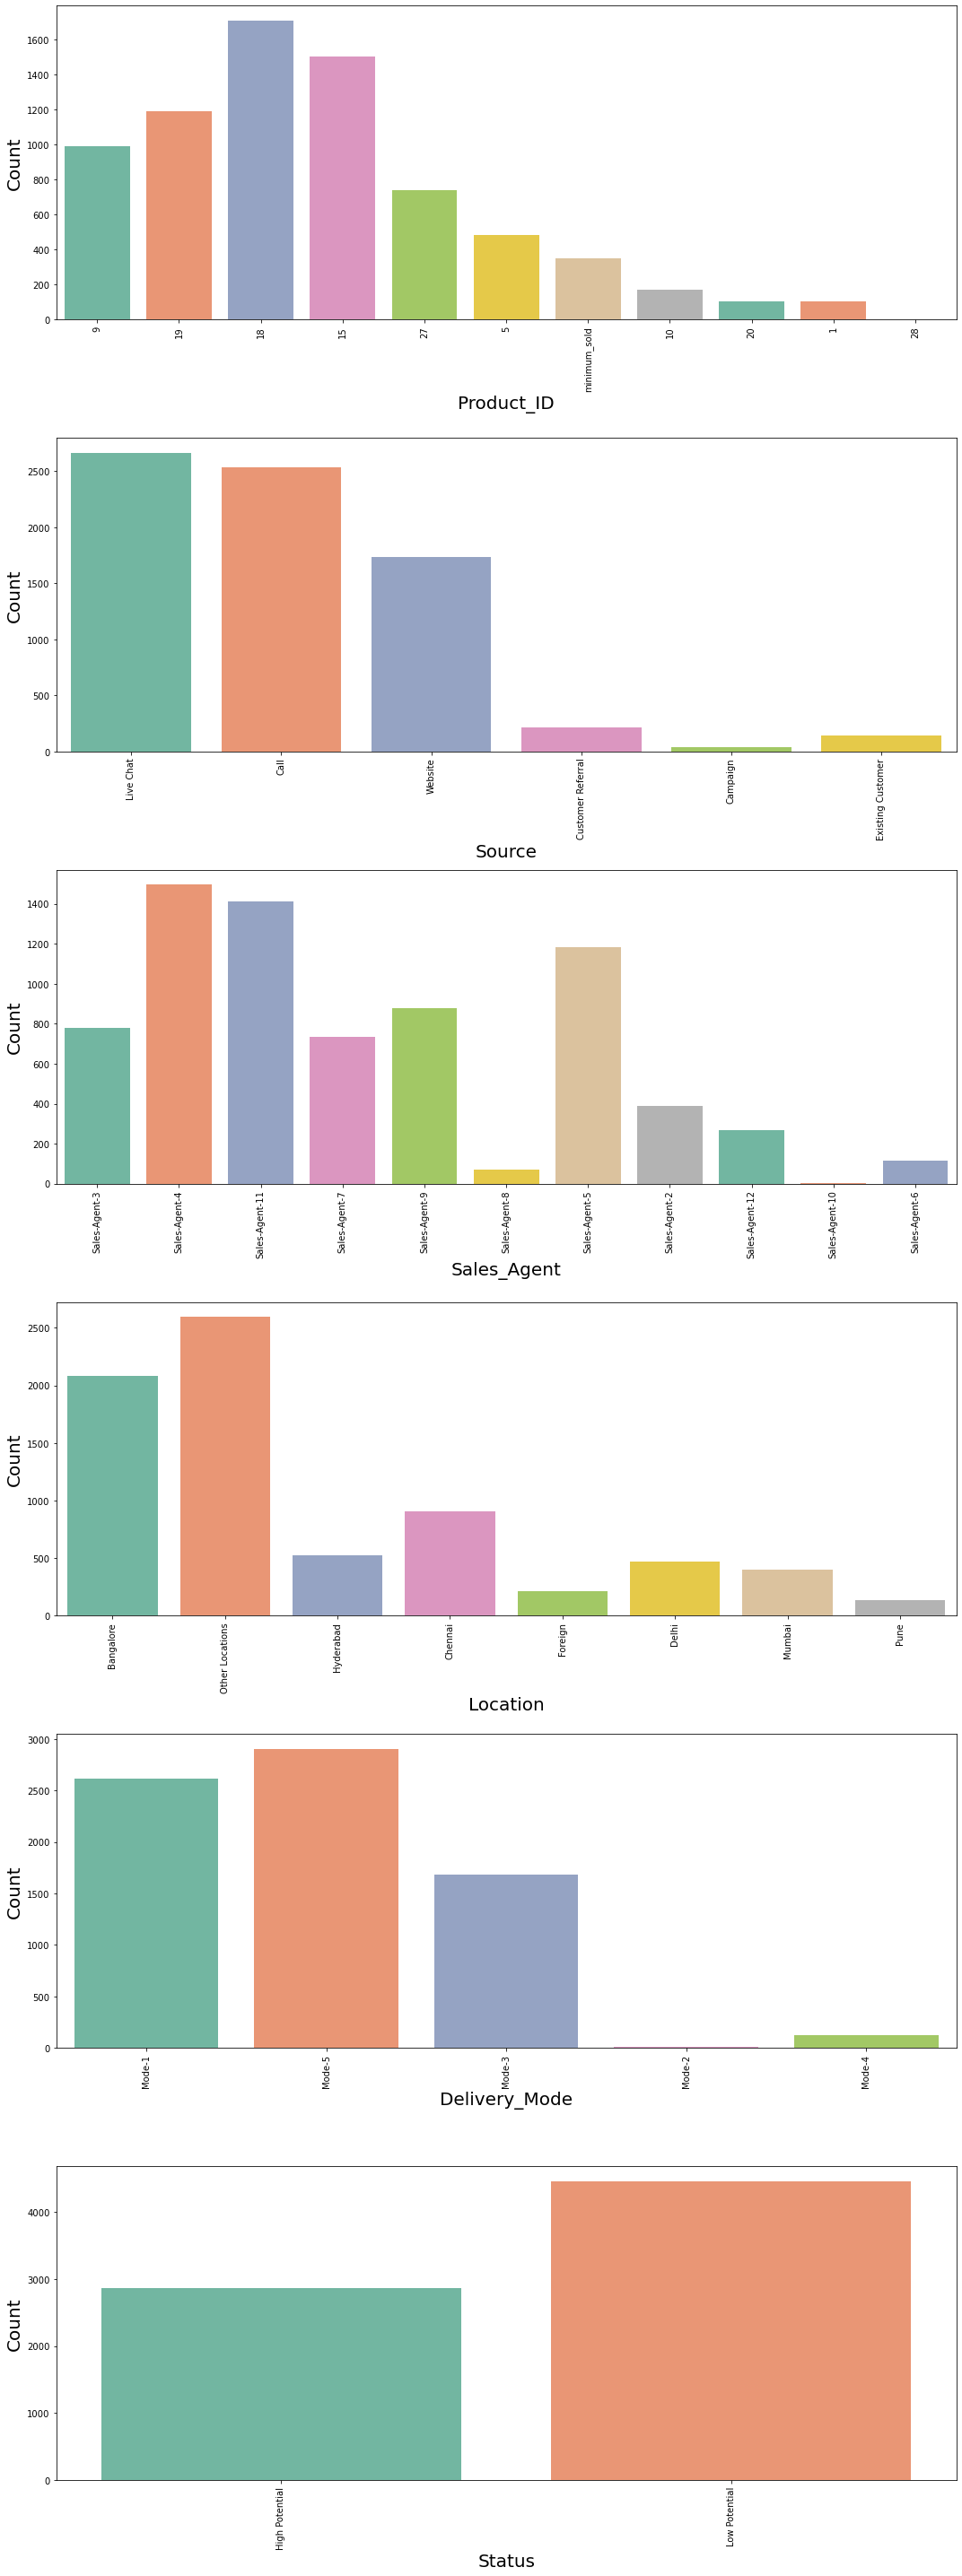

In [26]:
plt.figure(figsize=(15,40),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=6:
        ax=plt.subplot(6,1,plotnumber)
        sns.countplot(data[column],palette='Set2')
        plt.xticks(rotation=90)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

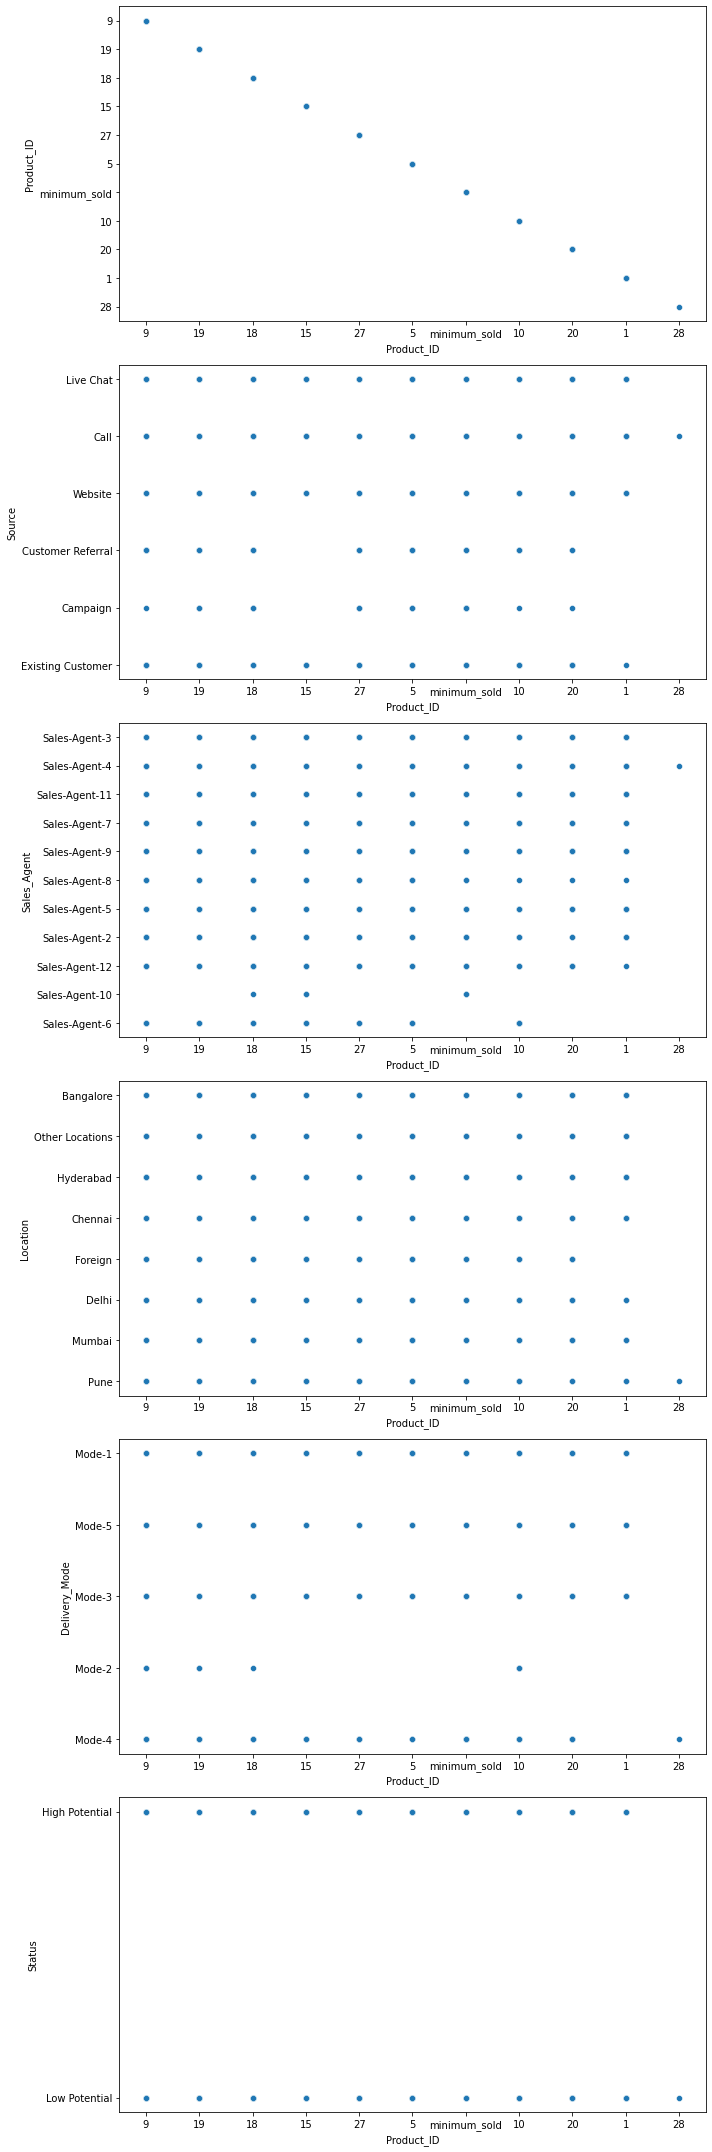

In [27]:
plt.figure(figsize=(10,30),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=6:
        ax=plt.subplot(6,1,plotnumber)
        sns.scatterplot(x=data['Product_ID'],y=data[column],data=data)
        plt.xlabel('Product_ID',fontsize=10)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:xlabel='Location', ylabel='count'>

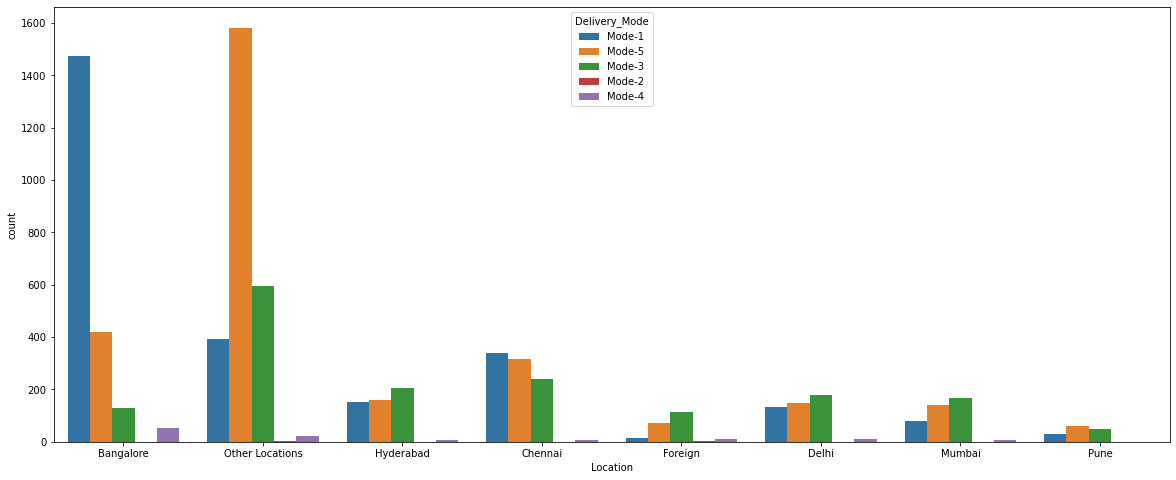

In [28]:
plt.figure(figsize=(20, 8))
sns.countplot(x='Location', hue='Delivery_Mode', data=data)

- In Banglore, the delivery mode for-1 is the maximum followed by mode -5

- In other locations, the delivery mode for 5 and the maximum followed by -3

- In Overseas, Hyderabad, Chennai, Delhi, Mumbai the delivery model for mode -4 is the least 

<AxesSubplot:xlabel='Location', ylabel='count'>

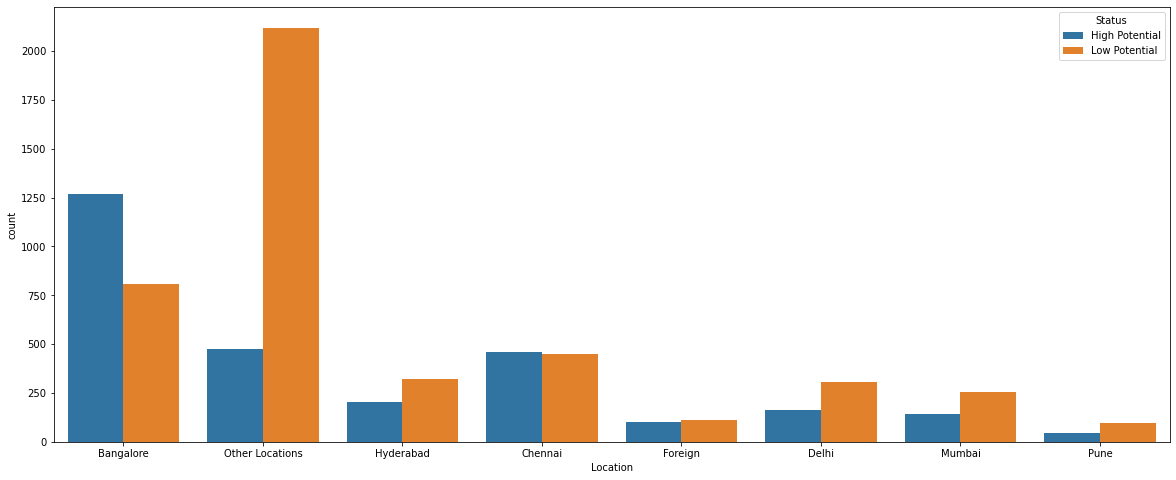

In [29]:
plt.figure(figsize=(20,8))
sns.countplot(x='Location', hue='Status', data=data)

- In Banglore, the counts for the high potential leads are maximum.
- In other locations, the counts for the low potential leads are minimum.
- In Foreign, the counts for the high potentials leads and low potential leads are almost the same.
- In chennai, the counts for the high potential leads and low potential leads are almost the same.
- Hyderabad, delhi, Mumbai, Pune the counts for low potentials leads are maximum

# Label Encoder

In [30]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9,Live Chat,Sales-Agent-3,Bangalore,Mode-1,High Potential
1,19,Call,Sales-Agent-4,Other Locations,Mode-5,High Potential
2,18,Website,Sales-Agent-11,Other Locations,Mode-1,High Potential
3,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Low Potential
4,18,Call,Sales-Agent-7,Bangalore,Mode-1,High Potential


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
##Label encoding all the columns

enc = LabelEncoder()
for i in (0,1,2,3,4,5):
    data.iloc[:,i]=enc.fit_transform(data.iloc[:,i])
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9,4,4,0,0,0
1,4,0,5,6,4,0
2,3,5,1,6,0,0
3,2,5,8,4,0,1
4,3,0,8,0,0,0


# Handling Outliers

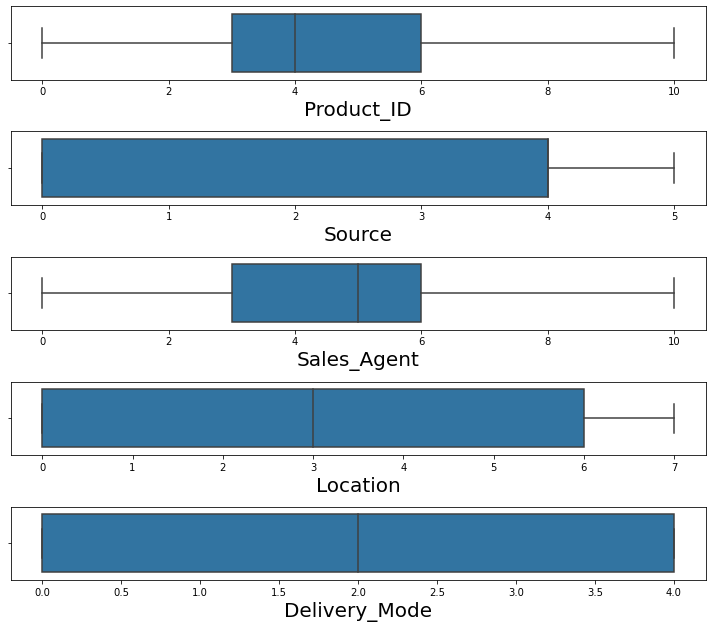

In [33]:
plt.figure(figsize=(10,10), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<6:
        ax=plt.subplot(6,1,plotnumber)
        sns.boxplot(x= data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- There is no need to handle outliers

# Feature Selection

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7328 entries, 0 to 7327
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Product_ID     7328 non-null   int32
 1   Source         7328 non-null   int32
 2   Sales_Agent    7328 non-null   int32
 3   Location       7328 non-null   int32
 4   Delivery_Mode  7328 non-null   int32
 5   Status         7328 non-null   int32
dtypes: int32(6)
memory usage: 171.9 KB


In [35]:
data.isnull().sum().dtype

dtype('int64')

<AxesSubplot:>

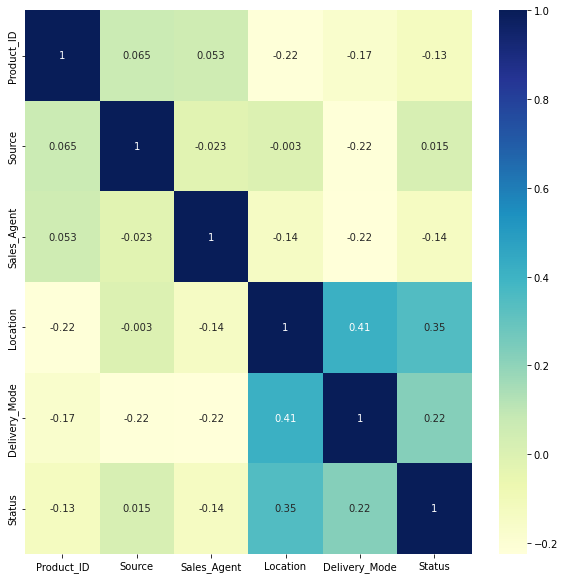

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

# Model creation

In [37]:
## Creating independent and dependent variables

X= data.drop('Status', axis=1)
y = data.Status

In [38]:
## Balancing the data
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_sm, y_sm=sm.fit_resample(X,y)
print(Counter(y_sm))

Counter({0: 4466, 1: 4466})


In [39]:
## Preparing training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)

In [40]:
X_train

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
29,2,0,1,6,4
6899,4,4,10,2,0
2618,2,0,3,6,4
2119,9,0,5,0,0
2890,2,5,6,5,2
...,...,...,...,...,...
5191,4,5,10,0,2
5226,3,5,6,1,4
5390,9,0,5,1,2
860,6,4,1,1,0


In [41]:
y_train

29      0
6899    1
2618    1
2119    0
2890    1
       ..
5191    0
5226    1
5390    1
860     0
7270    0
Name: Status, Length: 5496, dtype: int32

In [42]:
X_test

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
2576,2,5,1,6,4
1565,2,4,8,6,2
865,2,0,8,6,4
5769,2,0,1,6,4
3728,2,5,5,6,4
...,...,...,...,...,...
367,3,4,10,3,2
3520,9,4,1,6,4
5823,2,5,6,6,0
4840,6,5,1,6,4


In [43]:
y_train

29      0
6899    1
2618    1
2119    0
2890    1
       ..
5191    0
5226    1
5390    1
860     0
7270    0
Name: Status, Length: 5496, dtype: int32

In [44]:
X_train.shape

(5496, 5)

In [45]:
y_train.shape

(5496,)

In [46]:
X_test.shape

(1832, 5)

In [47]:
y_test.shape

(1832,)

# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [49]:
y_pred_lr=clf.predict(X_test)
y_pred_lr

array([1, 1, 1, ..., 1, 1, 1])

In [50]:
train_pred_lr=clf.predict(X_train)
train_pred_lr

array([1, 0, 1, ..., 0, 1, 0])

### Model evaluation for Logistic regression

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score,precision_score, classification_report, f1_score

In [52]:
cm_lr=confusion_matrix(y_test,y_pred_lr)
print(cm_lr)

[[379 372]
 [240 841]]


In [53]:
recall_lr=recall_score(y_test,y_pred_lr)
recall_lr

0.7779833487511564

In [54]:
precision_lr=precision_score(y_test,y_pred_lr)
precision_lr

0.6933223413025557

In [55]:
f1score_lr=f1_score(y_test,y_pred_lr)
f1score_lr

0.7332170880557978

In [56]:
acc_lr=accuracy_score(y_test,y_pred_lr)
acc_lr

0.665938864628821

In [57]:
cr_lr=classification_report(y_test,y_pred_lr)
print(cr_lr)

              precision    recall  f1-score   support

           0       0.61      0.50      0.55       751
           1       0.69      0.78      0.73      1081

    accuracy                           0.67      1832
   macro avg       0.65      0.64      0.64      1832
weighted avg       0.66      0.67      0.66      1832



In [58]:
acc_train_lr=accuracy_score(y_train, train_pred_lr)
acc_train_lr

0.6779475982532751

In [59]:
cr_train_lr=classification_report(y_train,train_pred_lr)
print(cr_train_lr)

              precision    recall  f1-score   support

           0       0.59      0.51      0.55      2111
           1       0.72      0.78      0.75      3385

    accuracy                           0.68      5496
   macro avg       0.66      0.65      0.65      5496
weighted avg       0.67      0.68      0.67      5496



In [60]:
print("Training Accuracy score:",acc_train_lr*100)

Training Accuracy score: 67.79475982532752


In [61]:
print('Testing Accuracy score:',acc_lr*100)

Testing Accuracy score: 66.5938864628821


In [62]:
test_roc_auc = roc_auc_score(y_test, y_pred_lr)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.641


- Logistic Regression is not performing well on both testing and training data

# Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_hat_dt = dt.predict(X_test)
y_hat_dt

array([1, 1, 1, ..., 1, 1, 1])

In [64]:
train_predict_dt = dt.predict(X_train)
train_predict_dt

array([1, 0, 1, ..., 1, 0, 0])

### Model Evaluation

In [65]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, precision_score, recall_score

In [66]:
cm_dt=confusion_matrix(y_test, y_hat_dt)
print(cm_dt)

[[461 290]
 [311 770]]


In [67]:
recall_dt=recall_score(y_test, y_hat_dt)
recall_dt

0.7123034227567068

In [68]:
precision_dt=precision_score(y_test, y_hat_dt)
precision_dt

0.7264150943396226

In [69]:
f1score_dt=f1_score(y_test, y_hat_dt)
f1score_dt

0.7192900513778607

In [70]:
acc_dt=accuracy_score(y_test, y_hat_dt)
acc_dt

0.6719432314410481

In [71]:
cr_dt=classification_report(y_test, y_hat_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.60      0.61      0.61       751
           1       0.73      0.71      0.72      1081

    accuracy                           0.67      1832
   macro avg       0.66      0.66      0.66      1832
weighted avg       0.67      0.67      0.67      1832



In [72]:
acc_dt1=accuracy_score(y_train, train_predict_dt)
acc_dt1

0.8402474526928675

In [73]:
cr_train_dt=classification_report(y_train, train_predict_dt)
print(cr_train_dt)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      2111
           1       0.89      0.85      0.87      3385

    accuracy                           0.84      5496
   macro avg       0.83      0.84      0.83      5496
weighted avg       0.84      0.84      0.84      5496



In [74]:
acc_dt1=accuracy_score(y_train, train_predict_dt)
acc_dt1

0.8402474526928675

In [75]:
cr_train_dt=classification_report(y_train, train_predict_dt)
print(cr_train_dt)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      2111
           1       0.89      0.85      0.87      3385

    accuracy                           0.84      5496
   macro avg       0.83      0.84      0.83      5496
weighted avg       0.84      0.84      0.84      5496



In [76]:
print('Testing Accuracy score:', acc_dt*100)

Testing Accuracy score: 67.1943231441048


In [77]:
print('Training Accuracy score:',acc_dt1*100)

Training Accuracy score: 84.02474526928675


 - Decision Tree seems to be working good on Training data but not on Testing data.

### Hyperparamater tuning

In [78]:
## importing Library

from sklearn.model_selection import GridSearchCV

## Tuning the parameter

params = {
    "criterion":("gini", "entropy"),
    "splitter" :("best", "random"),
    "max_depth":(list(range(1, 30))),
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":list(range(1,10)),
}

tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=2, cv=3)

# Fitting training data

tree_cv.fit(X_train, y_train)

# get the best paramketer
best_params = tree_cv.best_params_
print(f"Best parameters:{best_params}")


Fitting 3 folds for each of 4176 candidates, totalling 12528 fits
Best parameters:{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [79]:
## Placing the parameter on decision tree classifier
dt1 = DecisionTreeClassifier(criterion='entropy',
                             max_depth=18, min_samples_leaf=1,
                             min_samples_split=2, splitter='random')

In [80]:
##Fitting training data
dt1.fit(X_train, y_train)

# Prediction on testing data
y_hat_DT = dt1.predict(X_test)
y_hat_DT

array([1, 1, 1, ..., 1, 1, 1])

In [81]:
train_pred_DT=dt1.predict(X_train)
train_pred_DT

array([1, 0, 1, ..., 1, 0, 0])

##### Model Evaluation after Hyperparameter tuning

In [82]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, precision_score, recall_score

In [83]:
recall_DT = recall_score(y_test, y_hat_DT)
recall_DT

0.7132284921369103

In [84]:
precision_DT = precision_score(y_test, y_hat_DT)
precision_DT

0.7198879551820728

In [85]:
f1score_DT=f1_score(y_test, y_hat_DT)
f1score_DT

0.716542750929368

In [86]:
acc_DT = accuracy_score(y_test, y_hat_DT)
acc_DT

0.6670305676855895

In [87]:
cm_DT = confusion_matrix(y_test, y_hat_DT)
print(cm_DT)

[[451 300]
 [310 771]]


In [88]:
cr_DT = classification_report(y_test, y_hat_DT)
print(cr_DT)

              precision    recall  f1-score   support

           0       0.59      0.60      0.60       751
           1       0.72      0.71      0.72      1081

    accuracy                           0.67      1832
   macro avg       0.66      0.66      0.66      1832
weighted avg       0.67      0.67      0.67      1832



In [89]:
acc_DT1 = accuracy_score(y_train, train_pred_DT)
acc_DT1

0.8393377001455604

In [90]:
cr_train_DT = classification_report(y_train, train_pred_DT)
print(cr_train_DT)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      2111
           1       0.89      0.85      0.87      3385

    accuracy                           0.84      5496
   macro avg       0.83      0.84      0.83      5496
weighted avg       0.84      0.84      0.84      5496



In [91]:
print("Testing Accurcay score after hyperparameter tuning:", acc_DT*100)

Testing Accurcay score after hyperparameter tuning: 66.70305676855895


In [92]:
print("Training Accuracy score after hyperparameter tuning:", acc_DT1*100)

Training Accuracy score after hyperparameter tuning: 83.93377001455605


In [93]:
test_roc_auc = roc_auc_score(y_test, y_hat_DT)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.657


 - Not much improvement is observed after hyperparameter tuning

# Random Forest Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [95]:
y_pred_rf=rf_clf.predict(X_test)
y_pred_rf

array([1, 1, 1, ..., 1, 1, 1])

In [96]:
train_predict_rf=rf_clf.predict(X_train)
train_predict_rf

array([1, 0, 1, ..., 1, 0, 0])

### Model Evaluation

In [97]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, precision_score, recall_score

In [98]:
cm_rf = confusion_matrix(y_test,y_pred_rf)
print(cm_rf)

[[419 332]
 [259 822]]


In [99]:
recall_rf=recall_score(y_test, y_pred_rf)
recall_rf

0.7604070305272895

In [100]:
f1score_rf=f1_score(y_test,y_pred_rf)
f1score_rf

0.7355704697986577

In [101]:
acc_rf=accuracy_score(y_test, y_pred_rf)
acc_rf

0.6774017467248908

In [102]:
cr_rf=classification_report(y_train,train_predict_rf)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      2111
           1       0.86      0.88      0.87      3385

    accuracy                           0.84      5496
   macro avg       0.83      0.83      0.83      5496
weighted avg       0.84      0.84      0.84      5496



In [103]:
print('Testing Accoracy score:',acc_rf*100)

Testing Accoracy score: 67.74017467248909


In [104]:
print('Training Accuracy_score:',acc_rf*100)

Training Accuracy_score: 67.74017467248909


In [105]:
acc_rf1=accuracy_score(y_train,train_predict_rf)
acc_rf1

0.8402474526928675

In [106]:
cr_rf1=classification_report(y_train,train_predict_rf)
print(cr_rf1)

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      2111
           1       0.86      0.88      0.87      3385

    accuracy                           0.84      5496
   macro avg       0.83      0.83      0.83      5496
weighted avg       0.84      0.84      0.84      5496



In [107]:
print('Testing Accuracy score:',acc_rf*100)

Testing Accuracy score: 67.74017467248909


In [108]:
print("Training Accuracy Score:",acc_rf1*100)

Training Accuracy Score: 84.02474526928675


- Random Forest Classifier is performing much well on training data than testing data

# Hyperparameter Tuning

In [109]:
## Imutation of parameter

from sklearn.model_selection import RandomizedSearchCV

# not used grid search cv beacuase memory reason

n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10,110, num=10)]
max_depth.append(None)
min_samples_split = [2,5,15]
min_samples_leaf = [1,2,4]


## Dictionary of parameter
random_grid = {'n_estimators': n_estimators , 'max_features':max_features,
              'max_depth':max_depth, 'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}

## object creation

rf_clf1 = RandomForestClassifier(random_state=42)
# provide random state beacuse select row and column randomly

#Randomized search cv with parameter
rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3,
                          verbose=3, random_state=42, n_jobs=-1)

## Fitting the training data
rf_cv.fit(X_train, y_train)

## Getting the best parameter
rf_best_params = rf_cv.best_params_
print(f"Best parameters:{rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters:{'n_estimators': 1366, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10})


In [110]:
rf_clf2 = RandomForestClassifier(**rf_best_params)

## Fitting the training data
rf_clf2.fit(X_train, y_train)

## Prediction on test data
y_pred_RF = rf_clf2.predict(X_test)
y_pred_RF

array([1, 1, 1, ..., 1, 1, 1])

In [111]:
train_predict_RF = rf_clf2.predict(X_train)
train_predict_RF

array([1, 0, 1, ..., 1, 1, 0])

#### Model Evaluation after hyperparameter tuning

In [112]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, precision_score, recall_score

In [113]:
recall_RF1 = recall_score(y_test, y_pred_RF)
recall_RF1

0.8334875115633672

In [114]:
precision_RF1 = precision_score(y_test, y_pred_RF)
precision_RF1

0.7208

In [115]:
f1score_RF1 = f1_score(y_test, y_pred_RF)
f1score_RF1

0.773058773058773

In [116]:
acc_RF1 =accuracy_score(y_test, y_pred_RF)
acc_RF1

0.7112445414847162

In [117]:
acc_RF=accuracy_score(y_test, y_pred_rf)
acc_RF

0.6774017467248908

In [118]:
cr_RF = classification_report(y_test, y_pred_RF)
print(cr_RF)

              precision    recall  f1-score   support

           0       0.69      0.54      0.60       751
           1       0.72      0.83      0.77      1081

    accuracy                           0.71      1832
   macro avg       0.71      0.68      0.69      1832
weighted avg       0.71      0.71      0.70      1832



In [119]:
cr_RF1 = classification_report(y_train, train_predict_RF)
print(cr_RF1)

              precision    recall  f1-score   support

           0       0.75      0.61      0.67      2111
           1       0.78      0.87      0.82      3385

    accuracy                           0.77      5496
   macro avg       0.76      0.74      0.75      5496
weighted avg       0.77      0.77      0.77      5496



In [120]:
print('Testing Accuracy score after hyperparameter tuning:', acc_RF*100)

Testing Accuracy score after hyperparameter tuning: 67.74017467248909


In [121]:
print('Training Accuracy score after hyperparameter tuning:',acc_RF1*100)

Training Accuracy score after hyperparameter tuning: 71.12445414847161


In [122]:
test_roc_auc = roc_auc_score(y_test, y_pred_rf)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.659


# Gradient Boosting Classifier

In [123]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(learning_rate=0.1, n_estimators=150, random_state=42)
gbc.fit(X_train, y_train)
gbc_pred=gbc.predict(X_test)
gbc_pred

array([1, 1, 1, ..., 1, 1, 1])

In [124]:
train_predict_gbc=gbc.predict(X_train)
train_predict_gbc

array([1, 0, 1, ..., 0, 1, 0])

### Model Evaluation

In [125]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,precision_score,recall_score

In [126]:
recall_gbc=recall_score(y_test,gbc_pred)
recall_gbc

0.8334875115633672

In [127]:
precision_gbc = precision_score(y_test, gbc_pred)
precision_gbc

0.726027397260274

In [128]:
precision_gbc=precision_score(y_test,gbc_pred)
precision_gbc

0.726027397260274

In [129]:
acc_gbc=accuracy_score(y_test, gbc_pred)
acc_gbc

0.7161572052401747

In [130]:
f1score_gbc=recall_score(y_test, gbc_pred)
f1score_gbc

0.8334875115633672

In [131]:
cm_gbc=confusion_matrix(y_test,gbc_pred)
print(cm_gbc)

[[411 340]
 [180 901]]


In [132]:
cr_gbc=classification_report(y_test,gbc_pred)
print(cr_gbc)

              precision    recall  f1-score   support

           0       0.70      0.55      0.61       751
           1       0.73      0.83      0.78      1081

    accuracy                           0.72      1832
   macro avg       0.71      0.69      0.69      1832
weighted avg       0.71      0.72      0.71      1832



In [133]:
acc_gbc1=accuracy_score(y_train,train_predict_gbc)
acc_gbc1

0.7378093158660844

In [134]:
cr_gbc1=classification_report(y_train,train_predict_gbc)
print(cr_gbc1)

              precision    recall  f1-score   support

           0       0.70      0.56      0.62      2111
           1       0.76      0.85      0.80      3385

    accuracy                           0.74      5496
   macro avg       0.73      0.70      0.71      5496
weighted avg       0.73      0.74      0.73      5496



In [135]:
print('Testing accuracy score:',acc_gbc*100)

Testing accuracy score: 71.61572052401746


In [136]:
print('Training Accuracy score:',acc_gbc1*100)

Training Accuracy score: 73.78093158660845


In [137]:
test_roc_auc = roc_auc_score(y_test, gbc_pred)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.690


- Gradient boosting equally working good on both testing and training data

# Comparison Table

In [138]:
Comparision_dict={'Model Name':['Logistic regression', 'Decision Tree Classifier','Random Forest Classifier','GradientBoostingClassifier'],
                 'Training_ Accuracy':[67.794,68.39,68.39,71.61],
                 'Test_Accuracy':[66.59,83.988,69.32,73.78],
                 'Test_roc_auc_score':[0.641,0.661,0.666,0.690]}

In [139]:
comparisione_df=pd.DataFrame(Comparision_dict)

In [140]:
comparisione_df

,Model Name,Training_ Accuracy,Test_Accuracy,Test_roc_auc_score
0,Logistic regression,67.794,66.590,0.641
1,Decision Tree Classifier,68.390,83.988,0.661
2,Random Forest Classifier,68.390,69.320,0.666
3,GradientBoostingClassifier,71.610,73.780,0.690


# Challenges Faced

- As the dataset had lots of label values, assigning multiple labels into single label was a difficult task


# Conclusion

 - The client is a IT solution provider with products ranging from on-premises product to SAAS based solutions. as we know, the company's sales is dependent on lead quality. Due to more new competitors entering the market, Ficzon is experiencing the dip in sales.
 
 - Four machine learning models i.e **Logistic regression, Decision tree cLassifier, Random forest classifier, Gradient boosting classifier** were examined in this case study to predict the lead category(High Potential,Low Potential) at the business segment level.
 
 - Also used hyperparameter tuning to examine the scores.
 
 - **Best Performing model to predict the lead category is an ensembled technique model i.e GradientBoosting classifier.**
 
 - Gradient Boosting is one of the variant of ensemble the method where we can create multiple weak models and combine them to get better performance as a whole.
 - The given project was successfully delivered to the client Ficzon